<a href="https://colab.research.google.com/github/KevinFiorentino/JupyterNotebook/blob/master/Jupyter_Wines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0) Preparación del Entorno

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 

In [0]:
!wget -O wine.csv "https://drive.google.com/uc?export=download&id=1bexD-rAY7b0-XQhWd9p51Us1UhcQ_qZs"

--2019-05-11 22:17:42--  https://drive.google.com/uc?export=download&id=1bexD-rAY7b0-XQhWd9p51Us1UhcQ_qZs
Resolving drive.google.com (drive.google.com)... 74.125.141.113, 74.125.141.138, 74.125.141.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f32mglft99u6vqqo79m95imsprfkvb5a/1557612000000/11351302820947401900/*/1bexD-rAY7b0-XQhWd9p51Us1UhcQ_qZs?e=download [following]
--2019-05-11 22:17:43--  https://doc-0s-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f32mglft99u6vqqo79m95imsprfkvb5a/1557612000000/11351302820947401900/*/1bexD-rAY7b0-XQhWd9p51Us1UhcQ_qZs?e=download
Resolving doc-0s-as-docs.googleusercontent.com (doc-0s-as-docs.googleusercontent.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to doc-0s-as-docs.googleusercontent.com (doc-0s

# Prototipo I - Kevin - Wines

## 1) Entendimiento del Negocio

###Input variables (based on physicochemical tests):
   1. fixed acidity
   2. volatile acidity
   3. citric acid
   4. residual sugar
   5. chlorides
   6. free sulfur dioxide
   7. total sulfur dioxide
   8. density
   9. pH
   10. sulphates
   11. alcohol
   12. wine type (TARGET)


### Output variable (based on sensory data): 
   13. quality (score between 0 and 10)
   
   ----
   
### Webgrafía:
   
- https://www.youtube.com/watch?v=GuW0Doiye8g

- https://napsterinblue.github.io/notes/machine_learning/model_selection/grid_search/

## 2) Entendimiento de los Datos

In [0]:
data = pd.read_csv('wine.csv', sep=',', index_col=0)
wines = pd.DataFrame(data)

In [0]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,8.5,0.655,0.49,6.10,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,5,red
1,6.7,0.470,0.29,4.75,0.034,29.0,134.0,0.99056,3.29,0.46,13.0,7,White
2,5.8,0.190,0.24,1.30,0.044,38.0,128.0,0.99362,3.77,0.60,10.6,5,White
3,6.5,0.200,0.50,18.10,0.054,50.0,221.0,0.99941,2.94,0.64,8.8,6,White
4,5.6,0.605,0.05,2.40,0.073,19.0,25.0,0.99258,3.56,0.55,12.9,5,red


In [0]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,7.213854,0.338667,0.318628,5.469983,0.056053,30.733019,115.941409,0.994686,3.217333,0.529529,10.493907,5.818164
std,1.287939,0.164251,0.146342,4.715483,0.035773,17.571323,56.604841,0.002933,0.159624,0.148697,1.194671,0.873126
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.230000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992370,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.100000,0.047000,29.000000,118.000000,0.994880,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.200000,0.064000,42.000000,156.000000,0.996960,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,31.600000,0.611000,146.500000,366.500000,1.010300,4.010000,2.000000,14.900000,9.000000


In [0]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 0 to 5196
Data columns (total 13 columns):
fixed acidity           5197 non-null float64
volatile acidity        5197 non-null float64
citric acid             5197 non-null float64
residual sugar          5197 non-null float64
chlorides               5197 non-null float64
free sulfur dioxide     5197 non-null float64
total sulfur dioxide    5197 non-null float64
density                 5197 non-null float64
pH                      5197 non-null float64
sulphates               5197 non-null float64
alcohol                 5197 non-null float64
quality                 5197 non-null int64
type                    5197 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 568.4+ KB


In [0]:
print("Valores nulos en wines dataset:\n{}".format(wines.isnull().sum()))

Valores nulos en wines dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


In [0]:
#Convertimos 'type' en numérico para un mejor análisis
wines.type = wines.type.replace({"White":1, "red" : 0})

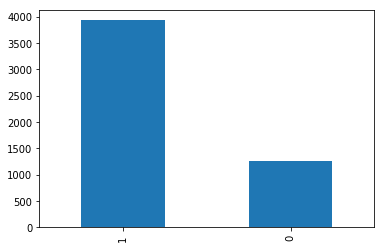

In [0]:
#Cantidad de vinos de cada tipo
wines['type'].value_counts().plot.bar()

In [0]:
nameCols = wines.columns.tolist()
#Quitamos 'type' por ser un string
nameCols.pop()
print(nameCols)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


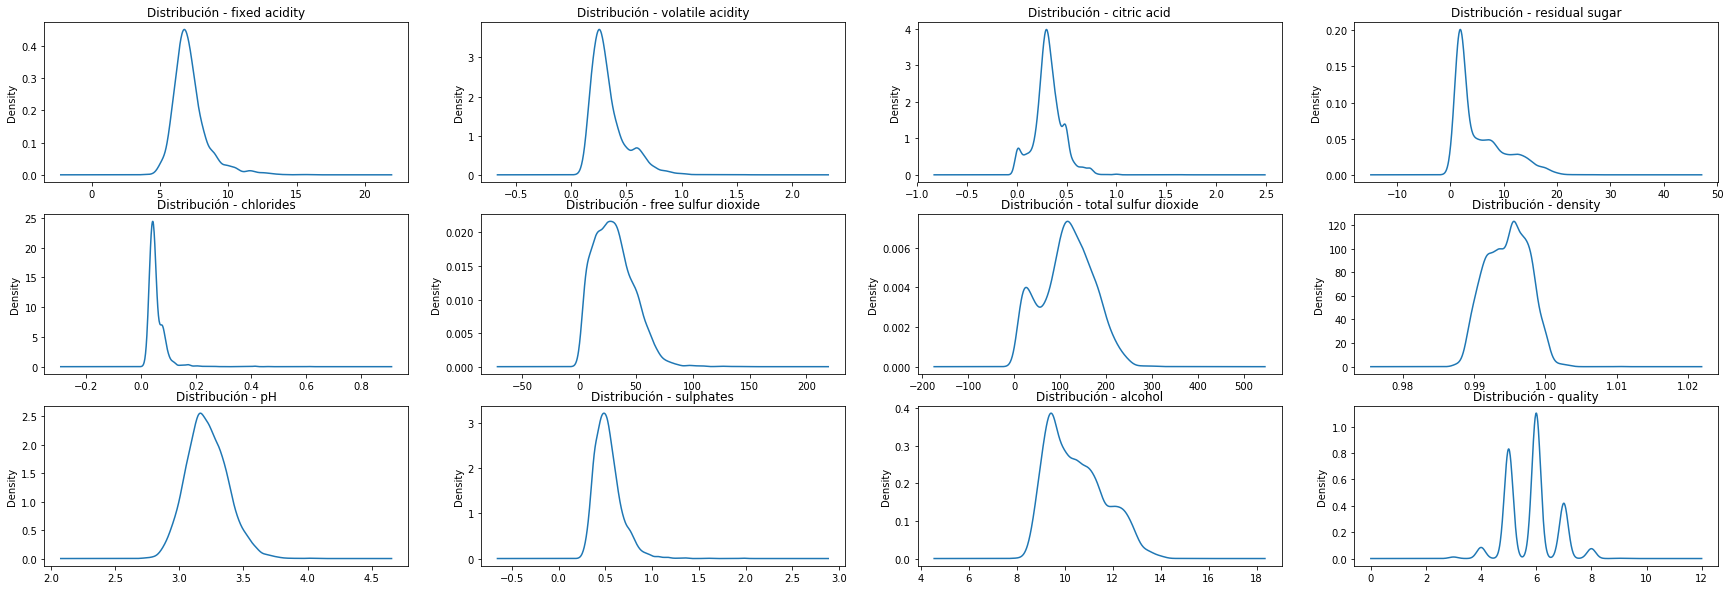

In [0]:
#Densidad de las variables
fig = plt.figure(figsize=(30,10))

x = 0
y = 0

for c in nameCols:
  plt.subplot2grid((3,4),(x,y))
  wines[c].plot.kde()
  plt.title('Distribución - ' + c)
  y += 1
  if y == 4:
    y = 0
    x += 1
    
plt.show()

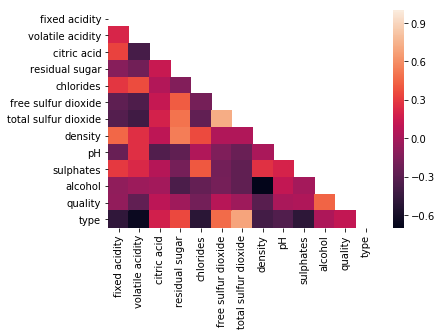

In [0]:
#Correlación entre variables
corr = wines.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, square=False, mask=mask)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


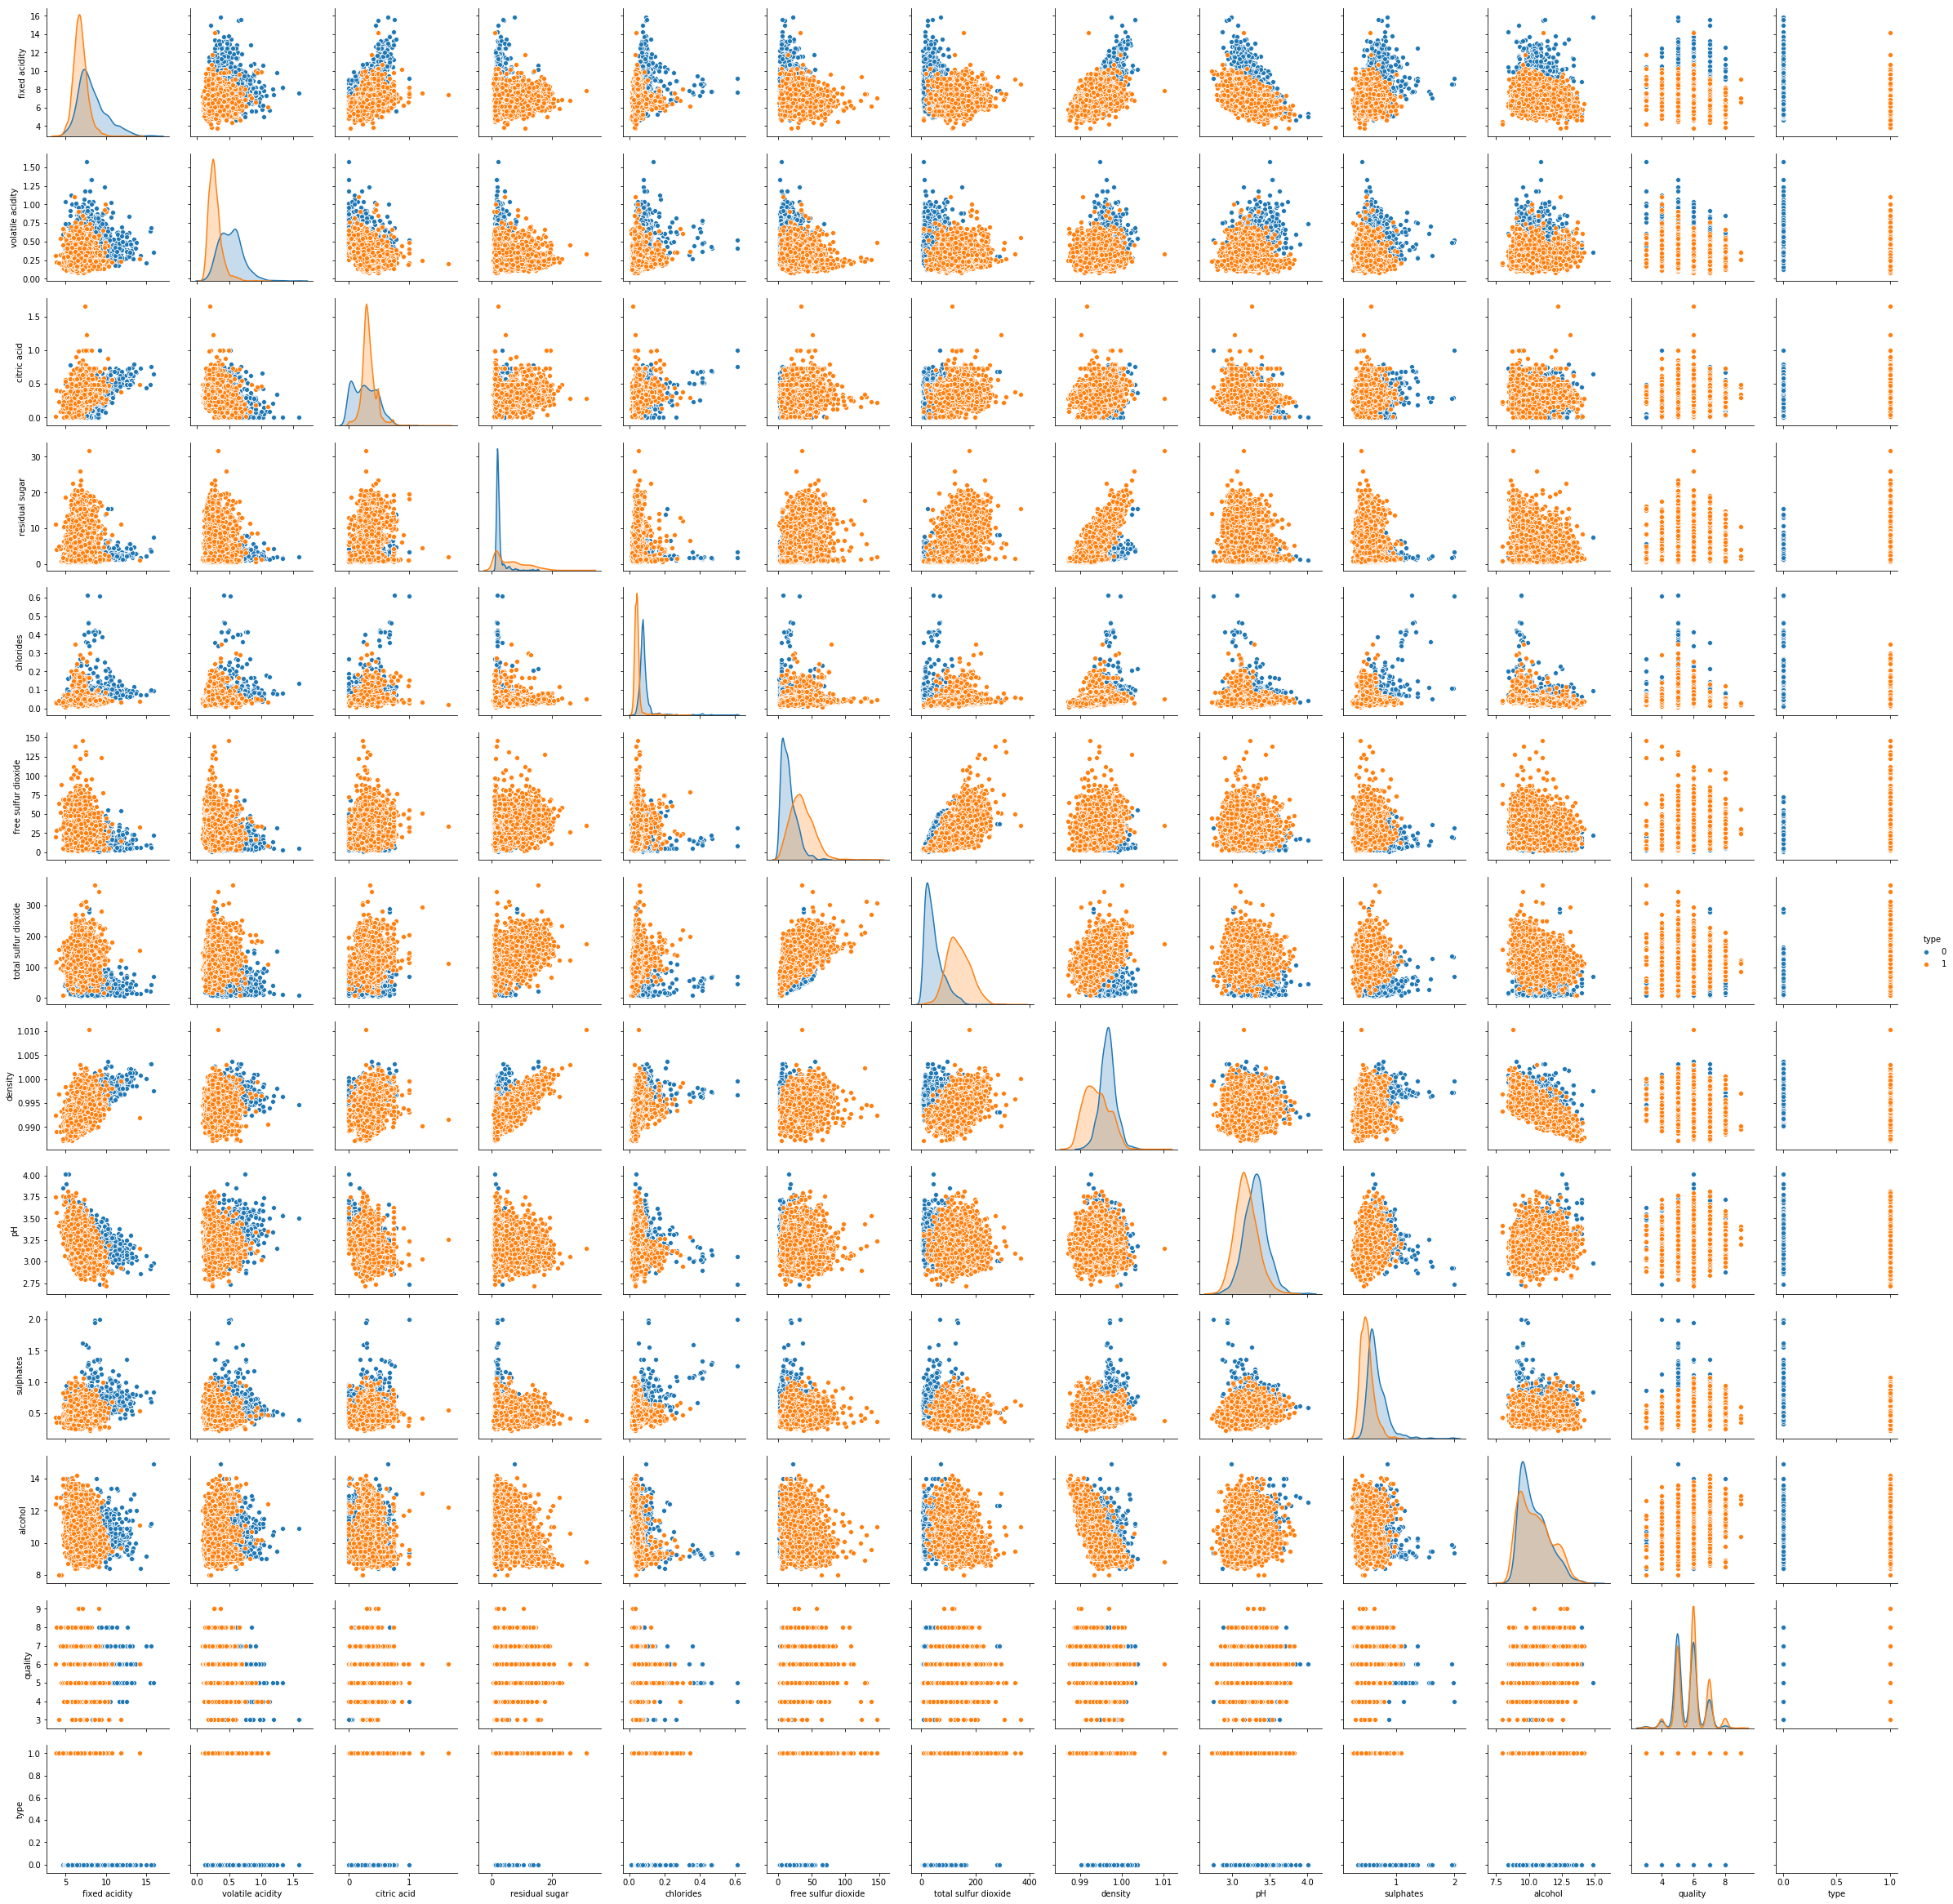

In [0]:
sns.pairplot(wines, hue = 'type', diag_kind="kde") 

DESCARGAR LOS DATASETS EN MI DRIVE

## 3) Modelado

- **Predecir tipo de vino**

## 4) Preparación de los Datos

- **Volvemos a crear el DataFrame**

In [0]:
data = pd.read_csv('wine.csv', sep=',', index_col=0)
wines = pd.DataFrame(data)

wines.type = wines.type.replace({"White":1, "red" : 0})

#### 4.1) Split dataset

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
test_size = 0.3
RANDOM_STATE = 12

X = wines.drop(['type'], axis=1)
y = wines['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RANDOM_STATE)

In [0]:
print("train: {} vs test {}".format(len(X_train), len(X_test)))

train: 3637 vs test 1560


## 5) Implementación

### LinearRegression

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LinearRegression(fit_intercept=True, n_jobs=None, normalize=True)
lr.fit(X_train, y_train)
y_predLR = lr.predict(X_test) 

### Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=12)
rfc.fit(X_train, y_train)
y_predRFC = rfc.predict(X_test)

### Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_predRFR = rfr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Support Vector Regression

In [0]:
from sklearn.svm import SVR

In [0]:
svr = SVR()
svr.fit(X_train, y_train)
y_predSVR = svr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Decision Tree Regressor

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
dtr = DecisionTreeRegressor(random_state=RANDOM_STATE)
dtr.fit(X_train, y_train)
y_predDTR = dtr.predict(X_test) 

## 5.1) Pipelines & GridSearchCV

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

cv = 10
n_jobs = -1
verbose = 2

### PipeGS - LinearRegression

In [0]:
#LinearRegression
pipelineLR = Pipeline([
    ('scl', StandardScaler()),
    ('LinearRegression', LinearRegression())
])

pipelineLR.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LinearRegression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [0]:
pipelineLR.score(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.874414387462306

In [0]:
paramGridLG = {
    'LinearRegression__fit_intercept' :(True, False),
    'LinearRegression__n_jobs' : (None, 1, -1),
    'LinearRegression__normalize' : (True, False)
}

gridSearchLG = GridSearchCV(
    estimator = pipelineLR,
    param_grid = paramGridLG,
    cv = cv,
    verbose = verbose,
    n_jobs = n_jobs,
)

In [0]:
gridSearchLG.fit(X_train, y_train)
print('Best Score: %s' % gridSearchLG.best_score_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8728776152235539


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [0]:
print('Best Parameters: ')
best_parameters = gridSearchLG.best_estimator_.get_params()
for param_name in sorted(paramGridLG.keys()):
  print("%s: %r" % (param_name, best_parameters[param_name]))

Best Parameters: 
LinearRegression__fit_intercept: True
LinearRegression__n_jobs: None
LinearRegression__normalize: True


### PipeGS - Random Forest Classifier

In [0]:
#RandomForestClassifier
pipelineRFC = Pipeline([
    ('scl', StandardScaler()),
    ('RandomForestClassifier', RandomForestClassifier())
])

pipelineRFC.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RandomForestClassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_s...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [0]:
pipelineRFC.score(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9994500962331592

In [0]:
paramGridRFC = {
    'RandomForestClassifier__n_estimators' : (10, 15, 20),
    'RandomForestClassifier__max_depth' : (None, 5, 10),
    'RandomForestClassifier__min_samples_split' : (2, 3, 4),
}

gridSearchRFC = GridSearchCV(
    estimator = pipelineRFC,
    param_grid = paramGridRFC,
    cv = cv,
    verbose = verbose,
    n_jobs = n_jobs,
)

In [0]:
gridSearchRFC.fit(X_train, y_train)
print('Best Score: %s' % gridSearchRFC.best_score_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.8s


Best Score: 0.9950508660984327


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   14.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [0]:
print('Best Parameters: ')
best_parameters = gridSearchRFC.best_estimator_.get_params()
for param_name in sorted(paramGridRFC.keys()):
  print("%s: %r" % (param_name, best_parameters[param_name]))

Best Parameters: 
RandomForestClassifier__max_depth: None
RandomForestClassifier__min_samples_split: 3
RandomForestClassifier__n_estimators: 20


### PipeGS - Random Forest Regressor

In [0]:
#RandomForestRegressor
pipelineRFR = Pipeline([
    ('scl', StandardScaler()),
    ('RandomForestRegressor', RandomForestRegressor())
])

pipelineRFR.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RandomForestRegressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [0]:
pipelineRFR.score(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9900255815417262

In [0]:
paramGridRFR = {
    'RandomForestRegressor__n_estimators' : (10, 15, 20),
    'RandomForestRegressor__max_depth' : (None, 5, 10),
    'RandomForestRegressor__min_samples_split' : (2, 3, 4),
}

gridSearchRFR = GridSearchCV(
    estimator = pipelineRFR,
    param_grid = paramGridRFR,
    cv = cv,
    verbose = verbose,
    n_jobs = n_jobs,
)

In [0]:
gridSearchRFR.fit(X_train, y_train)
print('Best Score: %s' % gridSearchRFR.best_score_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    7.2s


Best Score: 0.9494836064415552


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   27.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [0]:
print('Best Parameters: ')
best_parameters = gridSearchRFR.best_estimator_.get_params()
for param_name in sorted(paramGridRFR.keys()):
  print("%s: %r" % (param_name, best_parameters[param_name]))

Best Parameters: 
RandomForestRegressor__max_depth: 10
RandomForestRegressor__min_samples_split: 4
RandomForestRegressor__n_estimators: 15


### PipeGS - Support Vector Regression

In [0]:
pipelineSVR = Pipeline([
    ('scl', StandardScaler()),
    ('SVR', SVR())
])

pipelineSVR.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVR', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

In [0]:
pipelineSVR.score(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.969381245863604

In [0]:
paramGridSVR = {
  'SVR__C' : (1.0, 2.0, 3.0, 3.5),  
}

gridSearchSVR = GridSearchCV(
    estimator = pipelineSVR,
    param_grid = paramGridSVR,
    cv = cv,
    verbose = verbose,
    n_jobs = n_jobs,
)

In [0]:
gridSearchSVR.fit(X_train, y_train)
print('Best Score: %s' % gridSearchSVR.best_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Best Score: 0.9506048866851265


In [0]:
print('Best Parameters: ')
best_parameters = gridSearchSVR.best_estimator_.get_params()
for param_name in sorted(paramGridSVR.keys()):
  print("%s: %r" % (param_name, best_parameters[param_name]))

Best Parameters: 
SVR__C: 3.0


### PipeGS - Decision Tree Regressor

In [0]:
pipelineDTR = Pipeline([
    ('scl', StandardScaler()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
])

pipelineDTR.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('DecisionTreeRegressor', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'))])

In [0]:
pipelineDTR.score(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


1.0

In [0]:
paramGridDTR = {
  'DecisionTreeRegressor__max_depth' : (1.0, 2.0, 3.0, 3.5),
  'DecisionTreeRegressor__min_samples_split' : (2, 3, 4),
}

gridSearchDTR = GridSearchCV(
    estimator = pipelineDTR,
    param_grid = paramGridDTR,
    cv = cv,
    verbose = verbose,
    n_jobs = n_jobs,
)

In [0]:
gridSearchDTR.fit(X_train, y_train)
print('Best Score: %s' % gridSearchDTR.best_score_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8760425431612806


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [0]:
print('Best Parameters: ')
best_parameters = gridSearchDTR.best_estimator_.get_params()
for param_name in sorted(paramGridDTR.keys()):
  print("%s: %r" % (param_name, best_parameters[param_name]))

Best Parameters: 
DecisionTreeRegressor__max_depth: 3.0
DecisionTreeRegressor__min_samples_split: 2


## 6) Evaluación

In [0]:
from sklearn.metrics import mean_squared_error

### LinearRegression

In [0]:
MSE = mean_squared_error(y_test, y_predLR)
print('MSE = {}' . format(MSE))

MSE = 0.02536562097789141


###  Random Forest Classifier

In [0]:
MSE = mean_squared_error(y_test, y_predRFC)
print('MSE = {}' . format(MSE))

MSE = 0.014102564102564103


### Random Forest Regressor

In [0]:
MSE = mean_squared_error(y_test, y_predRFR)
print('MSE = {}' . format(MSE))

MSE = 0.010352564102564101


### Support Vector Regression

In [0]:
MSE = mean_squared_error(y_test, y_predSVR)
print('MSE = {}' . format(MSE))

MSE = 0.04875465998550694


### Decision Tree Regressor

In [0]:
MSE = mean_squared_error(y_test, y_predDTR)
print('MSE = {}' . format(MSE))

MSE = 0.014102564102564103


### 7) Presentación